In [2]:
import pandas as pd
import numpy as np
# from sklearn.model_selection import train_test_split, cross_val_score

# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib import pyplot as plt
import seaborn as sn

# from sklearn.preprocessing import MinMaxScaler

In [7]:
dataset = pd.read_csv('dataset.csv', index_col=0)

dataset.head()

,date,symbol,econ_branch,score,year,month,day,close,roi_month,roi_quarter,roi_halfyear,roi_year
0,2004-02-11,SU,Energy Minerals,0.953727,2004,2,11,13.285000,0.015807,-0.085058,0.048927,0.406473
1,2004-02-11,GGG,Producer Manufacturing,0.952753,2004,2,11,9.388889,-0.048047,-0.010888,0.087811,0.348402
2,2004-02-11,CWT,Utilities,0.934181,2004,2,11,14.720000,-0.002717,-0.068954,-0.070992,0.178668
3,2004-02-11,BLL,Process Industries,0.922862,2004,2,11,8.095000,0.006640,-0.023935,0.124923,0.361334
4,2004-02-11,APA,Energy Minerals,0.912117,2004,2,11,39.830002,0.008034,0.025860,0.082350,0.442882


In [8]:
dataset_prices = dataset
for roi in ['roi_month', 'roi_quarter', 'roi_halfyear', 'roi_year']:
    dataset_prices['price_'+roi[4:]] = dataset_prices['close']*(dataset_prices[roi]+1)
dataset_prices

,date,symbol,econ_branch,score,year,month,day,close,roi_month,roi_quarter,roi_halfyear,roi_year,price_month,price_quarter,price_halfyear,price_year
0,2004-02-11,SU,Energy Minerals,0.953727,2004,2,11,13.285000,0.015807,-0.085058,0.048927,0.406473,13.495000,12.155000,13.935000,18.684999
1,2004-02-11,GGG,Producer Manufacturing,0.952753,2004,2,11,9.388889,-0.048047,-0.010888,0.087811,0.348402,8.937778,9.286667,10.213333,12.660000
2,2004-02-11,CWT,Utilities,0.934181,2004,2,11,14.720000,-0.002717,-0.068954,-0.070992,0.178668,14.680000,13.705000,13.675000,17.350000
3,2004-02-11,BLL,Process Industries,0.922862,2004,2,11,8.095000,0.006640,-0.023935,0.124923,0.361334,8.148750,7.901250,9.106250,11.020000
4,2004-02-11,APA,Energy Minerals,0.912117,2004,2,11,39.830002,0.008034,0.025860,0.082350,0.442882,40.150002,40.860001,43.110001,57.470001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10405,2021-04-07,RPM,Process Industries,0.657795,2021,4,7,90.209999,0.080479,0.007538,-0.115397,-0.042013,97.470001,90.889999,79.800003,86.419998
10406,2021-04-07,AZO,Retail Trade,0.651998,2021,4,7,1423.270020,0.058970,0.088543,0.183001,0.514533,1507.199951,1549.290039,1683.729980,2155.590088
10407,2021-04-07,QRVO,Electronic Technology,0.650983,2021,4,7,193.690002,-0.049099,-0.008725,-0.146420,-0.409830,184.179993,192.000000,165.330002,114.309998
10408,2021-04-07,PHM,Consumer Durables,0.646593,2021,4,7,53.529999,0.153185,0.029516,-0.109658,-0.248085,61.730000,55.110001,47.660000,40.250000


<AxesSubplot:>

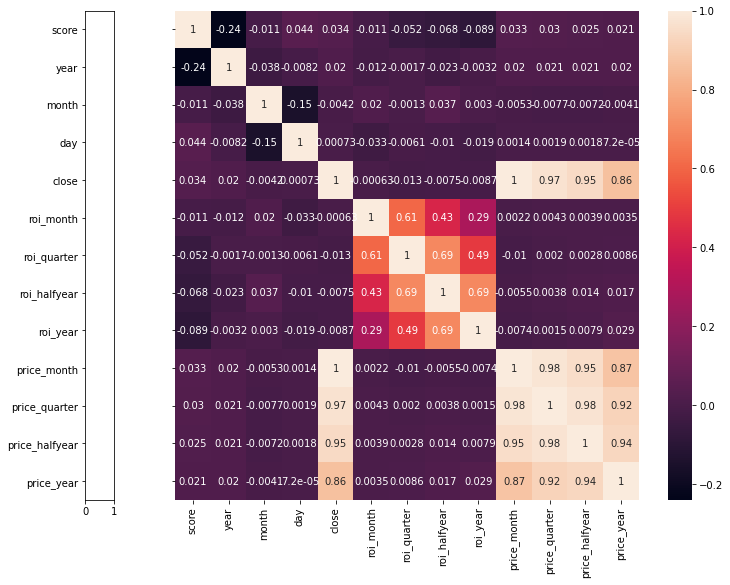

In [10]:
fig, ax = plt.subplots(1,2, figsize=(12, 9), sharey=True, gridspec_kw={'width_ratios': [1, 20]})
sn.heatmap(dataset_prices.corr(), annot=True)

In [11]:
feature_cols = ["date", "symbol", "econ_branch", "score", "year", "month", "day", "close"]

In [12]:
dataset_prices["day_sin"] = np.sin(2*np.pi*dataset_prices["day"]/31)
dataset_prices["day_cos"] = np.cos(2*np.pi*dataset_prices["day"]/31)
dataset_prices["month_sin"] = np.sin(2*np.pi*dataset_prices["month"]/12)
dataset_prices["month_cos"] = np.cos(2*np.pi*dataset_prices["month"]/12)
dataset_prices

,date,symbol,econ_branch,score,year,month,day,close,roi_month,roi_quarter,roi_halfyear,roi_year,price_month,price_quarter,price_halfyear,price_year,day_sin,day_cos,month_sin,month_cos
0,2004-02-11,SU,Energy Minerals,0.953727,2004,2,11,13.285000,0.015807,-0.085058,0.048927,0.406473,13.495000,12.155000,13.935000,18.684999,0.790776,-0.612106,0.866025,0.5
1,2004-02-11,GGG,Producer Manufacturing,0.952753,2004,2,11,9.388889,-0.048047,-0.010888,0.087811,0.348402,8.937778,9.286667,10.213333,12.660000,0.790776,-0.612106,0.866025,0.5
2,2004-02-11,CWT,Utilities,0.934181,2004,2,11,14.720000,-0.002717,-0.068954,-0.070992,0.178668,14.680000,13.705000,13.675000,17.350000,0.790776,-0.612106,0.866025,0.5
3,2004-02-11,BLL,Process Industries,0.922862,2004,2,11,8.095000,0.006640,-0.023935,0.124923,0.361334,8.148750,7.901250,9.106250,11.020000,0.790776,-0.612106,0.866025,0.5
4,2004-02-11,APA,Energy Minerals,0.912117,2004,2,11,39.830002,0.008034,0.025860,0.082350,0.442882,40.150002,40.860001,43.110001,57.470001,0.790776,-0.612106,0.866025,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10405,2021-04-07,RPM,Process Industries,0.657795,2021,4,7,90.209999,0.080479,0.007538,-0.115397,-0.042013,97.470001,90.889999,79.800003,86.419998,0.988468,0.151428,0.866025,-0.5
10406,2021-04-07,AZO,Retail Trade,0.651998,2021,4,7,1423.270020,0.058970,0.088543,0.183001,0.514533,1507.199951,1549.290039,1683.729980,2155.590088,0.988468,0.151428,0.866025,-0.5
10407,2021-04-07,QRVO,Electronic Technology,0.650983,2021,4,7,193.690002,-0.049099,-0.008725,-0.146420,-0.409830,184.179993,192.000000,165.330002,114.309998,0.988468,0.151428,0.866025,-0.5
10408,2021-04-07,PHM,Consumer Durables,0.646593,2021,4,7,53.529999,0.153185,0.029516,-0.109658,-0.248085,61.730000,55.110001,47.660000,40.250000,0.988468,0.151428,0.866025,-0.5


In [13]:
transformations = {"square": lambda x: x**2,
                    "cube": lambda x: x**3, 
                    "log": lambda x: np.log(x), 
                    "reciprocal": lambda x: 1/x,
                    "sqrt": lambda x: np.sqrt(x),
                    "sin": lambda x: np.sin(x),
                    "cos": lambda x: np.cos(x)
                    }

In [14]:
numeric_feature_cols = ["score", "year", "month", "day", "close"]

In [21]:
correlations = []
invest_horizon = "month" #"year" "halfyear" "quarter" "month"
y_col = "roi_"+invest_horizon
for feature_col in numeric_feature_cols:
    for transform_name, transformation in transformations.items():
        looked_at_transform = np.array(transformation(dataset_prices[feature_col].astype(float)))
        operation_name = f"{transform_name}({feature_col})"
        corr_value = np.corrcoef(dataset_prices[y_col].astype(float), looked_at_transform)[0][1]
        if not np.isnan(corr_value):
            correlations.append((operation_name, corr_value))
        for transform_name2, transformation2 in transformations.items():
            looked_at_transform = np.array(transformation2(transformation(dataset_prices[feature_col].astype(float))))
            operation_name = f"{transform_name2}({transform_name}({feature_col}))"
            corr_value = np.corrcoef(dataset_prices[y_col].astype(float), looked_at_transform)[0][1]
            if not np.isnan(corr_value):
                correlations.append((operation_name, corr_value))
                # print((operation_name, corr_value))
correlations.sort(reverse=True, key=lambda x: abs(x[1]))
correlations

[('reciprocal(sin(month))', -0.09215600772484177),
 ('sin(cos(day))', -0.09167481242489506),
 ('sin(sin(month))', -0.09136967923717744),
 ('cos(day)', -0.09002575448390647),
 ('sin(month)', -0.08987734855252301),
 ('reciprocal(log(close))', 0.08098305754354933),
 ('sin(cos(month))', 0.07890921683532225),
 ('cos(month)', 0.07824453642665112),
 ('cube(sin(month))', -0.07493557616978055),
 ('cube(cos(day))', -0.07096792941998441),
 ('cube(cos(month))', 0.07067635891995254),
 ('cube(cos(year))', 0.06714952851992191),
 ('sin(square(month))', 0.06639458539583559),
 ('cos(cube(day))', -0.06361480003456498),
 ('sin(cube(year))', -0.06287367389350668),
 ('reciprocal(cos(day))', -0.06102187035842899),
 ('sin(log(close))', 0.05999744850982468),
 ('reciprocal(cos(month))', 0.05436584075620122),
 ('cos(year)', 0.05372550707090734),
 ('sin(cos(year))', 0.05139259686665463),
 ('cos(log(day))', 0.05101442774800341),
 ('sin(reciprocal(score))', -0.048086541493159184),
 ('sqrt(reciprocal(day))', 0.04591

<AxesSubplot:>

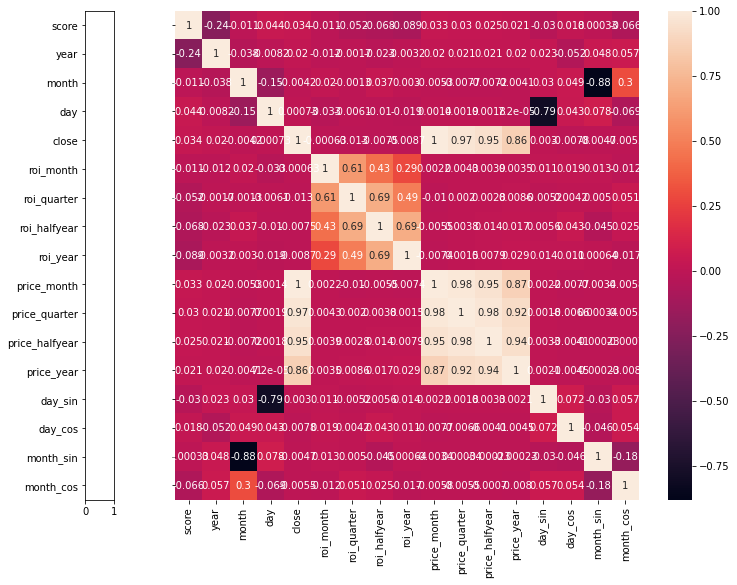

In [19]:
fig, ax = plt.subplots(1,2, figsize=(12, 9), sharey=True, gridspec_kw={'width_ratios': [1, 20]})
sn.heatmap(dataset_prices.corr(), annot=True)